In [1679]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression

In [1680]:
df=pd.read_csv("credit.csv")


In [1681]:
df

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-
5,6,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263,0,-
6,7,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,150,1,-
7,8,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200,141,-
8,9,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,10,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-


In [1682]:
df = df[df.Married != "?"]
df = df[df.BankCustomer != "?"]
df = df[df.EducationLevel != "?"]
df = df[df.Ethnicity != "?"]
df = df[df.YearsEmployed != "?"]
df = df[df.PriorDefault != "?"]
df = df[df.Employed != "?"]
df = df[df.CreditScore != "?"]

df = df[df.Citizen!= "?"]
df = df[df.ZipCode!= "?"]
df = df[df.Income!= "?"]
df = df[df.Approved!= "?"]
df = df[df.Male!= "?"]
df = df[df.Age!= "?"]
df

/home/harish/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
8,9,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,10,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-
10,11,a,27.67,1.500,u,g,m,v,2.000,t,f,0,f,s,368,0,-
12,13,a,49,1.500,u,g,j,j,0.000,t,f,0,t,g,100,27,-
13,14,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-
14,15,a,22.5,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-
15,16,a,28.5,1.000,u,g,q,v,1.000,t,t,2,t,g,167,500,-
16,17,a,25,11.000,y,p,aa,v,4.500,t,f,0,f,g,120,0,-
17,18,a,19.75,0.750,u,g,c,v,0.795,t,t,5,t,g,140,5,-
18,19,a,24.5,1.040,y,p,ff,ff,0.500,t,t,3,f,g,180,147,-


In [1683]:
df.drop(['Key'],axis=1)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
8,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-
10,a,27.67,1.500,u,g,m,v,2.000,t,f,0,f,s,368,0,-
12,a,49,1.500,u,g,j,j,0.000,t,f,0,t,g,100,27,-
13,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-
14,a,22.5,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-
15,a,28.5,1.000,u,g,q,v,1.000,t,t,2,t,g,167,500,-
16,a,25,11.000,y,p,aa,v,4.500,t,f,0,f,g,120,0,-
17,a,19.75,0.750,u,g,c,v,0.795,t,t,5,t,g,140,5,-
18,a,24.5,1.040,y,p,ff,ff,0.500,t,t,3,f,g,180,147,-


In [1684]:
sex=pd.get_dummies(df['Male'],drop_first=True)

In [1685]:
df=df.drop('Male',axis=1)

In [1686]:
df=pd.concat([df,sex],axis=1)

In [1687]:
df.drop(['Key'],axis=1)

,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b
8,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-,0
9,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-,0
10,27.67,1.500,u,g,m,v,2.000,t,f,0,f,s,368,0,-,0
12,49,1.500,u,g,j,j,0.000,t,f,0,t,g,100,27,-,0
13,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-,0
14,22.5,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-,0
15,28.5,1.000,u,g,q,v,1.000,t,t,2,t,g,167,500,-,0
16,25,11.000,y,p,aa,v,4.500,t,f,0,f,g,120,0,-,0
17,19.75,0.750,u,g,c,v,0.795,t,t,5,t,g,140,5,-,0
18,24.5,1.040,y,p,ff,ff,0.500,t,t,3,f,g,180,147,-,0


In [1688]:
df["Age"] = [ x.split('.')[0] for x in df["Age"] ] 
df["Age"]= df["Age"].astype(int)
x=df["Age"].mean()
y=math.ceil(x)
df["Age"]=df["Age"].replace(0,y)
df

,Key,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b
8,9,38,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-,0
9,10,19,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-,0
10,11,27,1.500,u,g,m,v,2.000,t,f,0,f,s,368,0,-,0
12,13,49,1.500,u,g,j,j,0.000,t,f,0,t,g,100,27,-,0
13,14,28,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-,0
14,15,22,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-,0
15,16,28,1.000,u,g,q,v,1.000,t,t,2,t,g,167,500,-,0
16,17,25,11.000,y,p,aa,v,4.500,t,f,0,f,g,120,0,-,0
17,18,19,0.750,u,g,c,v,0.795,t,t,5,t,g,140,5,-,0
18,19,24,1.040,y,p,ff,ff,0.500,t,t,3,f,g,180,147,-,0


In [1689]:
df["Debt"]= df["Debt"].astype(int)
x=df["Debt"].mean()
y=math.ceil(x)
df["Debt"]=df["Debt"].replace(0,y)
df

,Key,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b
8,9,38,5,u,g,cc,v,13.500,t,f,0,t,g,980,0,-,0
9,10,19,5,y,p,aa,v,0.585,t,f,0,t,g,160,0,-,0
10,11,27,1,u,g,m,v,2.000,t,f,0,f,s,368,0,-,0
12,13,49,1,u,g,j,j,0.000,t,f,0,t,g,100,27,-,0
13,14,28,3,u,g,i,bb,0.500,t,f,0,t,g,171,0,-,0
14,15,22,11,y,p,q,v,3.000,t,f,0,t,g,268,0,-,0
15,16,28,1,u,g,q,v,1.000,t,t,2,t,g,167,500,-,0
16,17,25,11,y,p,aa,v,4.500,t,f,0,f,g,120,0,-,0
17,18,19,5,u,g,c,v,0.795,t,t,5,t,g,140,5,-,0
18,19,24,1,y,p,ff,ff,0.500,t,t,3,f,g,180,147,-,0


In [1690]:
df.dtypes

Key                 int64
Age                 int64
Debt                int64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
b                   uint8
dtype: object

In [1691]:
marry=pd.get_dummies(df['Married'],drop_first=True)
df=df.drop('Married',axis=1)
df=pd.concat([df,marry],axis=1)
df.drop(['Key'],axis=1)

,Age,Debt,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b,u,y
8,38,5,g,cc,v,13.500,t,f,0,t,g,980,0,-,0,1,0
9,19,5,p,aa,v,0.585,t,f,0,t,g,160,0,-,0,0,1
10,27,1,g,m,v,2.000,t,f,0,f,s,368,0,-,0,1,0
12,49,1,g,j,j,0.000,t,f,0,t,g,100,27,-,0,1,0
13,28,3,g,i,bb,0.500,t,f,0,t,g,171,0,-,0,1,0
14,22,11,p,q,v,3.000,t,f,0,t,g,268,0,-,0,0,1
15,28,1,g,q,v,1.000,t,t,2,t,g,167,500,-,0,1,0
16,25,11,p,aa,v,4.500,t,f,0,f,g,120,0,-,0,0,1
17,19,5,g,c,v,0.795,t,t,5,t,g,140,5,-,0,1,0
18,24,1,p,ff,ff,0.500,t,t,3,f,g,180,147,-,0,0,1


In [1692]:
B_costumer=pd.get_dummies(df['BankCustomer'],drop_first=True)
df=df.drop('BankCustomer',axis=1)
df=pd.concat([df,B_costumer],axis=1)
df.drop(['Key'],axis=1)

,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b,u,y,gg,p
8,38,5,cc,v,13.500,t,f,0,t,g,980,0,-,0,1,0,0,0
9,19,5,aa,v,0.585,t,f,0,t,g,160,0,-,0,0,1,0,1
10,27,1,m,v,2.000,t,f,0,f,s,368,0,-,0,1,0,0,0
12,49,1,j,j,0.000,t,f,0,t,g,100,27,-,0,1,0,0,0
13,28,3,i,bb,0.500,t,f,0,t,g,171,0,-,0,1,0,0,0
14,22,11,q,v,3.000,t,f,0,t,g,268,0,-,0,0,1,0,1
15,28,1,q,v,1.000,t,t,2,t,g,167,500,-,0,1,0,0,0
16,25,11,aa,v,4.500,t,f,0,f,g,120,0,-,0,0,1,0,1
17,19,5,c,v,0.795,t,t,5,t,g,140,5,-,0,1,0,0,0
18,24,1,ff,ff,0.500,t,t,3,f,g,180,147,-,0,0,1,0,1


In [1693]:
df.dtypes

Key                 int64
Age                 int64
Debt                int64
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
b                   uint8
u                   uint8
y                   uint8
gg                  uint8
p                   uint8
dtype: object

In [1694]:
prio=pd.get_dummies(df['PriorDefault'],drop_first=True)
df=df.drop('PriorDefault',axis=1)
df=pd.concat([df,prio],axis=1)
df.drop(['Key'],axis=1)

,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,b,u,y,gg,p,t
8,38,5,cc,v,13.500,f,0,t,g,980,0,-,0,1,0,0,0,1
9,19,5,aa,v,0.585,f,0,t,g,160,0,-,0,0,1,0,1,1
10,27,1,m,v,2.000,f,0,f,s,368,0,-,0,1,0,0,0,1
12,49,1,j,j,0.000,f,0,t,g,100,27,-,0,1,0,0,0,1
13,28,3,i,bb,0.500,f,0,t,g,171,0,-,0,1,0,0,0,1
14,22,11,q,v,3.000,f,0,t,g,268,0,-,0,0,1,0,1,1
15,28,1,q,v,1.000,t,2,t,g,167,500,-,0,1,0,0,0,1
16,25,11,aa,v,4.500,f,0,f,g,120,0,-,0,0,1,0,1,1
17,19,5,c,v,0.795,t,5,t,g,140,5,-,0,1,0,0,0,1
18,24,1,ff,ff,0.500,t,3,f,g,180,147,-,0,0,1,0,1,1


In [1695]:
pd.get_dummies(df,drop_first=True).shape

(554, 187)

In [1696]:
df.EducationLevel.value_counts().sort_values(ascending=False).head(20)

c     115
q      62
w      50
i      49
aa     48
ff     46
k      42
x      31
m      30
cc     28
e      21
d      20
j      10
r       2
Name: EducationLevel, dtype: int64

In [1697]:
top_10=[x for x in df.EducationLevel.value_counts().sort_values(ascending=False).head(10).index]

In [1698]:
top_10

['c', 'q', 'w', 'i', 'aa', 'ff', 'k', 'x', 'm', 'cc']

In [1699]:
import numpy as np
for label in top_10:
    df[label]=np.where(df['EducationLevel']==label,1,0)
df[['EducationLevel']+top_10].head(40)

,EducationLevel,c,q,w,i,aa,ff,k,x,m,cc
8,cc,0,0,0,0,0,0,0,0,0,1
9,aa,0,0,0,0,1,0,0,0,0,0
10,m,0,0,0,0,0,0,0,0,1,0
12,j,0,0,0,0,0,0,0,0,0,0
13,i,0,0,0,1,0,0,0,0,0,0
14,q,0,1,0,0,0,0,0,0,0,0
15,q,0,1,0,0,0,0,0,0,0,0
16,aa,0,0,0,0,1,0,0,0,0,0
17,c,1,0,0,0,0,0,0,0,0,0
18,ff,0,0,0,0,0,1,0,0,0,0


In [1700]:
df.drop(['EducationLevel','Key'],axis=1)

,Age,Debt,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,...,c,q,w,i,aa,ff,k,x,m,cc
8,38,5,v,13.500,f,0,t,g,980,0,...,0,0,0,0,0,0,0,0,0,1
9,19,5,v,0.585,f,0,t,g,160,0,...,0,0,0,0,1,0,0,0,0,0
10,27,1,v,2.000,f,0,f,s,368,0,...,0,0,0,0,0,0,0,0,1,0
12,49,1,j,0.000,f,0,t,g,100,27,...,0,0,0,0,0,0,0,0,0,0
13,28,3,bb,0.500,f,0,t,g,171,0,...,0,0,0,1,0,0,0,0,0,0
14,22,11,v,3.000,f,0,t,g,268,0,...,0,1,0,0,0,0,0,0,0,0
15,28,1,v,1.000,t,2,t,g,167,500,...,0,1,0,0,0,0,0,0,0,0
16,25,11,v,4.500,f,0,f,g,120,0,...,0,0,0,0,1,0,0,0,0,0
17,19,5,v,0.795,t,5,t,g,140,5,...,1,0,0,0,0,0,0,0,0,0
18,24,1,ff,0.500,t,3,f,g,180,147,...,0,0,0,0,0,1,0,0,0,0


In [1701]:
df.Ethnicity.value_counts().sort_values(ascending=False).head(20)

v     323
h     104
ff     50
bb     49
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [1702]:
top_5=[x for x in df.Ethnicity.value_counts().sort_values(ascending=False).head(5).index]

In [1703]:
top_5

['v', 'h', 'ff', 'bb', 'z']

In [1704]:
for label in top_5:
    df[label]=np.where(df['Ethnicity']==label,1,0)
df[['Ethnicity']+top_5].head(40)

,Ethnicity,v,h,ff,bb,z
8,v,1,0,0,0,0
9,v,1,0,0,0,0
10,v,1,0,0,0,0
12,j,0,0,0,0,0
13,bb,0,0,0,1,0
14,v,1,0,0,0,0
15,v,1,0,0,0,0
16,v,1,0,0,0,0
17,v,1,0,0,0,0
18,ff,0,0,1,0,0


In [1705]:
df.drop(['Ethnicity','Key','EducationLevel'],axis=1)

,Age,Debt,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,...,aa,ff,k,x,m,cc,v,h,bb,z
8,38,5,13.500,f,0,t,g,980,0,-,...,0,0,0,0,0,1,1,0,0,0
9,19,5,0.585,f,0,t,g,160,0,-,...,1,0,0,0,0,0,1,0,0,0
10,27,1,2.000,f,0,f,s,368,0,-,...,0,0,0,0,1,0,1,0,0,0
12,49,1,0.000,f,0,t,g,100,27,-,...,0,0,0,0,0,0,0,0,0,0
13,28,3,0.500,f,0,t,g,171,0,-,...,0,0,0,0,0,0,0,0,1,0
14,22,11,3.000,f,0,t,g,268,0,-,...,0,0,0,0,0,0,1,0,0,0
15,28,1,1.000,t,2,t,g,167,500,-,...,0,0,0,0,0,0,1,0,0,0
16,25,11,4.500,f,0,f,g,120,0,-,...,1,0,0,0,0,0,1,0,0,0
17,19,5,0.795,t,5,t,g,140,5,-,...,0,0,0,0,0,0,1,0,0,0
18,24,1,0.500,t,3,f,g,180,147,-,...,0,1,0,0,0,0,0,0,0,0


In [1706]:
df.columns

Index(['Key', 'Age', 'Debt', 'EducationLevel', 'Ethnicity', 'YearsEmployed',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income', 'Approved', 'b', 'u', 'y', 'gg', 'p', 't', 'c', 'q', 'w', 'i',
       'aa', 'ff', 'k', 'x', 'm', 'cc', 'v', 'h', 'bb', 'z'],
      dtype='object')

In [1707]:
df.Citizen.value_counts().sort_values(ascending=False).head(20)

g    504
s     48
p      2
Name: Citizen, dtype: int64

In [1708]:
top_2=[x for x in df.Citizen.value_counts().sort_values(ascending=False).head(2).index]

In [1709]:
top_2

['g', 's']

In [1710]:
for label in top_2:
    df[label]=np.where(df['Citizen']==label,1,0)
df[['Citizen']+top_2].head(40)

,Citizen,g,s
8,g,1,0
9,g,1,0
10,s,0,1
12,g,1,0
13,g,1,0
14,g,1,0
15,g,1,0
16,g,1,0
17,g,1,0
18,g,1,0


In [1711]:
df

,Key,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,...,k,x,m,cc,v,h,bb,z,g,s
8,9,38,5,cc,v,13.500,f,0,t,g,...,0,0,0,1,1,0,0,0,1,0
9,10,19,5,aa,v,0.585,f,0,t,g,...,0,0,0,0,1,0,0,0,1,0
10,11,27,1,m,v,2.000,f,0,f,s,...,0,0,1,0,1,0,0,0,0,1
12,13,49,1,j,j,0.000,f,0,t,g,...,0,0,0,0,0,0,0,0,1,0
13,14,28,3,i,bb,0.500,f,0,t,g,...,0,0,0,0,0,0,1,0,1,0
14,15,22,11,q,v,3.000,f,0,t,g,...,0,0,0,0,1,0,0,0,1,0
15,16,28,1,q,v,1.000,t,2,t,g,...,0,0,0,0,1,0,0,0,1,0
16,17,25,11,aa,v,4.500,f,0,f,g,...,0,0,0,0,1,0,0,0,1,0
17,18,19,5,c,v,0.795,t,5,t,g,...,0,0,0,0,1,0,0,0,1,0
18,19,24,1,ff,ff,0.500,t,3,f,g,...,0,0,0,0,0,0,0,0,1,0


In [1712]:
df["YearsEmployed"]= df["YearsEmployed"].astype(int)
x=df["YearsEmployed"].mean()
y=math.ceil(x)
df["YearsEmployed"]=df["YearsEmployed"].replace(0,y)
df

,Key,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,...,k,x,m,cc,v,h,bb,z,g,s
8,9,38,5,cc,v,13,f,0,t,g,...,0,0,0,1,1,0,0,0,1,0
9,10,19,5,aa,v,2,f,0,t,g,...,0,0,0,0,1,0,0,0,1,0
10,11,27,1,m,v,2,f,0,f,s,...,0,0,1,0,1,0,0,0,0,1
12,13,49,1,j,j,2,f,0,t,g,...,0,0,0,0,0,0,0,0,1,0
13,14,28,3,i,bb,2,f,0,t,g,...,0,0,0,0,0,0,1,0,1,0
14,15,22,11,q,v,3,f,0,t,g,...,0,0,0,0,1,0,0,0,1,0
15,16,28,1,q,v,1,t,2,t,g,...,0,0,0,0,1,0,0,0,1,0
16,17,25,11,aa,v,4,f,0,f,g,...,0,0,0,0,1,0,0,0,1,0
17,18,19,5,c,v,2,t,5,t,g,...,0,0,0,0,1,0,0,0,1,0
18,19,24,1,ff,ff,2,t,3,f,g,...,0,0,0,0,0,0,0,0,1,0


In [1713]:
employ=pd.get_dummies(df['Employed'],drop_first=True)
df=df.drop('Employed',axis=1)
df=pd.concat([df,employ],axis=1)
df.drop(['Key'],axis=1)

,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,DriversLicense,Citizen,ZipCode,Income,...,x,m,cc,v,h,bb,z,g,s,t
8,38,5,cc,v,13,0,t,g,980,0,...,0,0,1,1,0,0,0,1,0,0
9,19,5,aa,v,2,0,t,g,160,0,...,0,0,0,1,0,0,0,1,0,0
10,27,1,m,v,2,0,f,s,368,0,...,0,1,0,1,0,0,0,0,1,0
12,49,1,j,j,2,0,t,g,100,27,...,0,0,0,0,0,0,0,1,0,0
13,28,3,i,bb,2,0,t,g,171,0,...,0,0,0,0,0,1,0,1,0,0
14,22,11,q,v,3,0,t,g,268,0,...,0,0,0,1,0,0,0,1,0,0
15,28,1,q,v,1,2,t,g,167,500,...,0,0,0,1,0,0,0,1,0,1
16,25,11,aa,v,4,0,f,g,120,0,...,0,0,0,1,0,0,0,1,0,0
17,19,5,c,v,2,5,t,g,140,5,...,0,0,0,1,0,0,0,1,0,1
18,24,1,ff,ff,2,3,f,g,180,147,...,0,0,0,0,0,0,0,1,0,1


In [1714]:
df=df.drop(['EducationLevel','Ethnicity','DriversLicense','Citizen','Key','u'],axis=1)

In [1715]:
df.drop('Approved',axis=1).head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,b,y,gg,p,...,x,m,cc,v,h,bb,z,g,s,t
8,38,5,13,0,980,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
9,19,5,2,0,160,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
10,27,1,2,0,368,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
12,49,1,2,0,100,27,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,28,3,2,0,171,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [1716]:
df

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Approved,b,y,gg,...,x,m,cc,v,h,bb,z,g,s,t
8,38,5,13,0,980,0,-,0,0,0,...,0,0,1,1,0,0,0,1,0,0
9,19,5,2,0,160,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
10,27,1,2,0,368,0,-,0,0,0,...,0,1,0,1,0,0,0,0,1,0
12,49,1,2,0,100,27,-,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,28,3,2,0,171,0,-,0,0,0,...,0,0,0,0,0,1,0,1,0,0
14,22,11,3,0,268,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
15,28,1,1,2,167,500,-,0,0,0,...,0,0,0,1,0,0,0,1,0,1
16,25,11,4,0,120,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
17,19,5,2,5,140,5,-,0,0,0,...,0,0,0,1,0,0,0,1,0,1
18,24,1,2,3,180,147,-,0,1,0,...,0,0,0,0,0,0,0,1,0,1


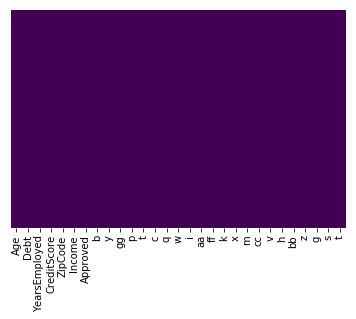

In [1717]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1718]:


df


,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Approved,b,y,gg,...,x,m,cc,v,h,bb,z,g,s,t
8,38,5,13,0,980,0,-,0,0,0,...,0,0,1,1,0,0,0,1,0,0
9,19,5,2,0,160,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
10,27,1,2,0,368,0,-,0,0,0,...,0,1,0,1,0,0,0,0,1,0
12,49,1,2,0,100,27,-,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,28,3,2,0,171,0,-,0,0,0,...,0,0,0,0,0,1,0,1,0,0
14,22,11,3,0,268,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
15,28,1,1,2,167,500,-,0,0,0,...,0,0,0,1,0,0,0,1,0,1
16,25,11,4,0,120,0,-,0,1,0,...,0,0,0,1,0,0,0,1,0,0
17,19,5,2,5,140,5,-,0,0,0,...,0,0,0,1,0,0,0,1,0,1
18,24,1,2,3,180,147,-,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [1719]:
df.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Approved', 'b', 'y', 'gg', 'p', 't', 'c', 'q', 'w', 'i', 'aa', 'ff',
       'k', 'x', 'm', 'cc', 'v', 'h', 'bb', 'z', 'g', 's', 't'],
      dtype='object')

In [1720]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [1721]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Approved',axis=1), 
                                                    df['Approved'], test_size=0.30, 
                                                    random_state=101)

In [1722]:
df.dtypes

Age               int64
Debt              int64
YearsEmployed     int64
CreditScore       int64
ZipCode          object
Income            int64
Approved         object
b                 uint8
y                 uint8
gg                uint8
p                 uint8
t                 uint8
c                 int64
q                 int64
w                 int64
i                 int64
aa                int64
ff                int64
k                 int64
x                 int64
m                 int64
cc                int64
v                 int64
h                 int64
bb                int64
z                 int64
g                 int64
s                 int64
t                 uint8
dtype: object

In [1723]:


logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)



/home/harish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1724]:

predictions = logmodel.predict(X_test)

In [1725]:

from sklearn.metrics import confusion_matrix

In [1726]:
accuracy=confusion_matrix(y_test,predictions)

In [1727]:
accuracy

array([[47, 10],
       [20, 90]])

In [1728]:


from sklearn.metrics import accuracy_score



In [1729]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8203592814371258

In [1730]:
predictions

array(['-', '-', '+', '+', '+', '-', '-', '-', '-', '+', '-', '+', '+',
       '+', '-', '-', '-', '-', '-', '+', '-', '-', '+', '-', '-', '-',
       '-', '-', '-', '-', '-', '+', '+', '-', '-', '-', '+', '-', '-',
       '+', '+', '-', '+', '-', '+', '-', '-', '+', '-', '-', '-', '-',
       '-', '+', '-', '+', '-', '+', '-', '-', '-', '+', '-', '-', '+',
       '-', '-', '-', '-', '+', '-', '-', '+', '+', '-', '-', '+', '+',
       '+', '-', '+', '+', '-', '-', '-', '+', '-', '+', '+', '-', '-',
       '+', '-', '-', '-', '-', '-', '-', '-', '+', '-', '+', '+', '+',
       '-', '+', '-', '-', '-', '-', '-', '+', '+', '-', '-', '+', '+',
       '+', '+', '+', '+', '+', '+', '-', '+', '+', '+', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '+', '-', '-', '-', '-', '-', '-',
       '+', '-', '+', '-', '+', '+', '+', '-', '+', '+', '+', '-', '-',
       '-', '+', '+', '-', '+', '+', '-', '-', '+', '+', '-'],
      dtype=object)

In [1731]:
from sklearn.metrics import classification_report

In [1732]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           +       0.70      0.82      0.76        57
           -       0.90      0.82      0.86       110

   micro avg       0.82      0.82      0.82       167
   macro avg       0.80      0.82      0.81       167
weighted avg       0.83      0.82      0.82       167



In [1733]:
df = pd.read_csv('test(2).csv')

In [1734]:
df

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,120,1
5,6,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465,150
6,7,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0,2
7,8,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240,117
8,9,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17
9,10,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246


In [1735]:
x = df.drop(['Key'], axis =1)


In [1736]:
x

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,0,0
1,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180,0
2,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,80,5
3,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252,0
4,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,120,1
5,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465,150
6,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0,2
7,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240,117
8,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17
9,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246


In [1737]:
df

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,120,1
5,6,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465,150
6,7,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0,2
7,8,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240,117
8,9,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17
9,10,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246


In [1738]:
sex=pd.get_dummies(df['Male'],drop_first=True)
df=df.drop('Male',axis=1)
df=pd.concat([df,sex],axis=1)

In [1739]:
df["Debt"]= df["Debt"].astype(int)
x=df["Debt"].mean()
y=math.ceil(x)
df["Debt"]=df["Debt"].replace(0,y)
df

,Key,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,a,b
0,1,31.83,6,y,p,m,v,0.040,f,f,0,f,g,0,0,0,1
1,2,21.75,11,u,g,c,v,0.250,f,f,0,t,g,180,0,1,0
2,3,17.92,6,u,g,c,v,1.750,f,t,1,t,g,80,5,1,0
3,4,30.33,6,u,g,d,h,0.085,f,f,0,t,s,252,0,0,1
4,5,51.83,2,y,p,ff,ff,1.500,f,f,0,f,g,120,1,0,1
5,6,47.17,5,u,g,w,v,5.500,f,f,0,f,g,465,150,0,1
6,7,25.83,12,u,g,cc,v,0.500,f,f,0,f,g,0,2,0,1
7,8,50.25,6,u,g,aa,v,0.500,f,f,0,t,g,240,117,1,0
8,9,29.50,2,y,p,e,h,2.000,f,f,0,f,g,256,17,0,0
9,10,37.33,2,u,g,i,h,0.210,f,f,0,f,g,260,246,1,0


In [1740]:
marry=pd.get_dummies(df['Married'],drop_first=True)
df=df.drop('Married',axis=1)
df=pd.concat([df,marry],axis=1)
df

,Key,Age,Debt,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,a,b,y
0,1,31.83,6,p,m,v,0.040,f,f,0,f,g,0,0,0,1,1
1,2,21.75,11,g,c,v,0.250,f,f,0,t,g,180,0,1,0,0
2,3,17.92,6,g,c,v,1.750,f,t,1,t,g,80,5,1,0,0
3,4,30.33,6,g,d,h,0.085,f,f,0,t,s,252,0,0,1,0
4,5,51.83,2,p,ff,ff,1.500,f,f,0,f,g,120,1,0,1,1
5,6,47.17,5,g,w,v,5.500,f,f,0,f,g,465,150,0,1,0
6,7,25.83,12,g,cc,v,0.500,f,f,0,f,g,0,2,0,1,0
7,8,50.25,6,g,aa,v,0.500,f,f,0,t,g,240,117,1,0,0
8,9,29.50,2,p,e,h,2.000,f,f,0,f,g,256,17,0,0,1
9,10,37.33,2,g,i,h,0.210,f,f,0,f,g,260,246,1,0,0


In [1741]:
B_costumer=pd.get_dummies(df['BankCustomer'],drop_first=True)
df=df.drop('BankCustomer',axis=1)
df=pd.concat([df,B_costumer],axis=1)
df

,Key,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,a,b,y,p
0,1,31.83,6,m,v,0.040,f,f,0,f,g,0,0,0,1,1,1
1,2,21.75,11,c,v,0.250,f,f,0,t,g,180,0,1,0,0,0
2,3,17.92,6,c,v,1.750,f,t,1,t,g,80,5,1,0,0,0
3,4,30.33,6,d,h,0.085,f,f,0,t,s,252,0,0,1,0,0
4,5,51.83,2,ff,ff,1.500,f,f,0,f,g,120,1,0,1,1,1
5,6,47.17,5,w,v,5.500,f,f,0,f,g,465,150,0,1,0,0
6,7,25.83,12,cc,v,0.500,f,f,0,f,g,0,2,0,1,0,0
7,8,50.25,6,aa,v,0.500,f,f,0,t,g,240,117,1,0,0,0
8,9,29.50,2,e,h,2.000,f,f,0,f,g,256,17,0,0,1,1
9,10,37.33,2,i,h,0.210,f,f,0,f,g,260,246,1,0,0,0


In [1742]:
prio=pd.get_dummies(df['PriorDefault'],drop_first=True)
df=df.drop('PriorDefault',axis=1)
df=pd.concat([df,prio],axis=1)

In [1743]:
df

,Key,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,a,b,y,p,t
0,1,31.83,6,m,v,0.040,f,0,f,g,0,0,0,1,1,1,0
1,2,21.75,11,c,v,0.250,f,0,t,g,180,0,1,0,0,0,0
2,3,17.92,6,c,v,1.750,t,1,t,g,80,5,1,0,0,0,0
3,4,30.33,6,d,h,0.085,f,0,t,s,252,0,0,1,0,0,0
4,5,51.83,2,ff,ff,1.500,f,0,f,g,120,1,0,1,1,1,0
5,6,47.17,5,w,v,5.500,f,0,f,g,465,150,0,1,0,0,0
6,7,25.83,12,cc,v,0.500,f,0,f,g,0,2,0,1,0,0,0
7,8,50.25,6,aa,v,0.500,f,0,t,g,240,117,1,0,0,0,0
8,9,29.50,2,e,h,2.000,f,0,f,g,256,17,0,0,1,1,0
9,10,37.33,2,i,h,0.210,f,0,f,g,260,246,1,0,0,0,0


In [1744]:
pd.get_dummies(df,drop_first=True).shape

(100, 30)

In [1745]:
df.EducationLevel.value_counts().sort_values(ascending=False).head(20)
top_10=[x for x in df.EducationLevel.value_counts().sort_values(ascending=False).head(10).index]
top_10
import numpy as np
for label in top_10:
    df[label]=np.where(df['EducationLevel']==label,1,0)
df[['EducationLevel']+top_10].head(40)

,EducationLevel,c,w,q,cc,m,i,d,k,x,e
0,m,0,0,0,0,1,0,0,0,0,0
1,c,1,0,0,0,0,0,0,0,0,0
2,c,1,0,0,0,0,0,0,0,0,0
3,d,0,0,0,0,0,0,1,0,0,0
4,ff,0,0,0,0,0,0,0,0,0,0
5,w,0,1,0,0,0,0,0,0,0,0
6,cc,0,0,0,1,0,0,0,0,0,0
7,aa,0,0,0,0,0,0,0,0,0,0
8,e,0,0,0,0,0,0,0,0,0,1
9,i,0,0,0,0,0,1,0,0,0,0


In [1746]:
df.drop(['EducationLevel'],axis=1)

,Key,Age,Debt,Ethnicity,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,...,c,w,q,cc,m,i,d,k,x,e
0,1,31.83,6,v,0.040,f,0,f,g,0,...,0,0,0,0,1,0,0,0,0,0
1,2,21.75,11,v,0.250,f,0,t,g,180,...,1,0,0,0,0,0,0,0,0,0
2,3,17.92,6,v,1.750,t,1,t,g,80,...,1,0,0,0,0,0,0,0,0,0
3,4,30.33,6,h,0.085,f,0,t,s,252,...,0,0,0,0,0,0,1,0,0,0
4,5,51.83,2,ff,1.500,f,0,f,g,120,...,0,0,0,0,0,0,0,0,0,0
5,6,47.17,5,v,5.500,f,0,f,g,465,...,0,1,0,0,0,0,0,0,0,0
6,7,25.83,12,v,0.500,f,0,f,g,0,...,0,0,0,1,0,0,0,0,0,0
7,8,50.25,6,v,0.500,f,0,t,g,240,...,0,0,0,0,0,0,0,0,0,0
8,9,29.50,2,h,2.000,f,0,f,g,256,...,0,0,0,0,0,0,0,0,0,1
9,10,37.33,2,h,0.210,f,0,f,g,260,...,0,0,0,0,0,1,0,0,0,0


In [1747]:
df.Ethnicity.value_counts().sort_values(ascending=False).head(20)
top_5=[x for x in df.Ethnicity.value_counts().sort_values(ascending=False).head(5).index]
top_5
for label in top_5:
    df[label]=np.where(df['Ethnicity']==label,1,0)
df[['Ethnicity']+top_5].head(40)

,Ethnicity,v,h,bb,ff
0,v,1,0,0,0
1,v,1,0,0,0
2,v,1,0,0,0
3,h,0,1,0,0
4,ff,0,0,0,1
5,v,1,0,0,0
6,v,1,0,0,0
7,v,1,0,0,0
8,h,0,1,0,0
9,h,0,1,0,0


In [1748]:
df=df.drop(['Ethnicity'],axis=1)

In [1749]:
df

,Key,Age,Debt,EducationLevel,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,...,m,i,d,k,x,e,v,h,bb,ff
0,1,31.83,6,m,0.040,f,0,f,g,0,...,1,0,0,0,0,0,1,0,0,0
1,2,21.75,11,c,0.250,f,0,t,g,180,...,0,0,0,0,0,0,1,0,0,0
2,3,17.92,6,c,1.750,t,1,t,g,80,...,0,0,0,0,0,0,1,0,0,0
3,4,30.33,6,d,0.085,f,0,t,s,252,...,0,0,1,0,0,0,0,1,0,0
4,5,51.83,2,ff,1.500,f,0,f,g,120,...,0,0,0,0,0,0,0,0,0,1
5,6,47.17,5,w,5.500,f,0,f,g,465,...,0,0,0,0,0,0,1,0,0,0
6,7,25.83,12,cc,0.500,f,0,f,g,0,...,0,0,0,0,0,0,1,0,0,0
7,8,50.25,6,aa,0.500,f,0,t,g,240,...,0,0,0,0,0,0,1,0,0,0
8,9,29.50,2,e,2.000,f,0,f,g,256,...,0,0,0,0,0,1,0,1,0,0
9,10,37.33,2,i,0.210,f,0,f,g,260,...,0,1,0,0,0,0,0,1,0,0


In [1750]:
df.Citizen.value_counts().sort_values(ascending=False).head(20)
top_2=[x for x in df.Citizen.value_counts().sort_values(ascending=False).head(2).index]
top_2
for label in top_2:
    df[label]=np.where(df['Citizen']==label,1,0)
df[['Citizen']+top_2].head(40)

,Citizen,g,s
0,g,1,0
1,g,1,0
2,g,1,0
3,s,0,1
4,g,1,0
5,g,1,0
6,g,1,0
7,g,1,0
8,g,1,0
9,g,1,0


In [1751]:
df

,Key,Age,Debt,EducationLevel,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,...,d,k,x,e,v,h,bb,ff,g,s
0,1,31.83,6,m,0.040,f,0,f,g,0,...,0,0,0,0,1,0,0,0,1,0
1,2,21.75,11,c,0.250,f,0,t,g,180,...,0,0,0,0,1,0,0,0,1,0
2,3,17.92,6,c,1.750,t,1,t,g,80,...,0,0,0,0,1,0,0,0,1,0
3,4,30.33,6,d,0.085,f,0,t,s,252,...,1,0,0,0,0,1,0,0,0,1
4,5,51.83,2,ff,1.500,f,0,f,g,120,...,0,0,0,0,0,0,0,1,1,0
5,6,47.17,5,w,5.500,f,0,f,g,465,...,0,0,0,0,1,0,0,0,1,0
6,7,25.83,12,cc,0.500,f,0,f,g,0,...,0,0,0,0,1,0,0,0,1,0
7,8,50.25,6,aa,0.500,f,0,t,g,240,...,0,0,0,0,1,0,0,0,1,0
8,9,29.50,2,e,2.000,f,0,f,g,256,...,0,0,0,1,0,1,0,0,1,0
9,10,37.33,2,i,0.210,f,0,f,g,260,...,0,0,0,0,0,1,0,0,1,0


In [1752]:
df["YearsEmployed"]= df["YearsEmployed"].astype(int)
x=df["YearsEmployed"].mean()
y=math.ceil(x)
df["YearsEmployed"]=df["YearsEmployed"].replace(0,y)
df

,Key,Age,Debt,EducationLevel,YearsEmployed,Employed,CreditScore,DriversLicense,Citizen,ZipCode,...,d,k,x,e,v,h,bb,ff,g,s
0,1,31.83,6,m,3,f,0,f,g,0,...,0,0,0,0,1,0,0,0,1,0
1,2,21.75,11,c,3,f,0,t,g,180,...,0,0,0,0,1,0,0,0,1,0
2,3,17.92,6,c,1,t,1,t,g,80,...,0,0,0,0,1,0,0,0,1,0
3,4,30.33,6,d,3,f,0,t,s,252,...,1,0,0,0,0,1,0,0,0,1
4,5,51.83,2,ff,1,f,0,f,g,120,...,0,0,0,0,0,0,0,1,1,0
5,6,47.17,5,w,5,f,0,f,g,465,...,0,0,0,0,1,0,0,0,1,0
6,7,25.83,12,cc,3,f,0,f,g,0,...,0,0,0,0,1,0,0,0,1,0
7,8,50.25,6,aa,3,f,0,t,g,240,...,0,0,0,0,1,0,0,0,1,0
8,9,29.50,2,e,2,f,0,f,g,256,...,0,0,0,1,0,1,0,0,1,0
9,10,37.33,2,i,3,f,0,f,g,260,...,0,0,0,0,0,1,0,0,1,0


In [1753]:
employ=pd.get_dummies(df['Employed'],drop_first=True)
df=df.drop('Employed',axis=1)
df=pd.concat([df,employ],axis=1)


In [1754]:
df

,Key,Age,Debt,EducationLevel,YearsEmployed,CreditScore,DriversLicense,Citizen,ZipCode,Income,...,k,x,e,v,h,bb,ff,g,s,t
0,1,31.83,6,m,3,0,f,g,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,21.75,11,c,3,0,t,g,180,0,...,0,0,0,1,0,0,0,1,0,0
2,3,17.92,6,c,1,1,t,g,80,5,...,0,0,0,1,0,0,0,1,0,1
3,4,30.33,6,d,3,0,t,s,252,0,...,0,0,0,0,1,0,0,0,1,0
4,5,51.83,2,ff,1,0,f,g,120,1,...,0,0,0,0,0,0,1,1,0,0
5,6,47.17,5,w,5,0,f,g,465,150,...,0,0,0,1,0,0,0,1,0,0
6,7,25.83,12,cc,3,0,f,g,0,2,...,0,0,0,1,0,0,0,1,0,0
7,8,50.25,6,aa,3,0,t,g,240,117,...,0,0,0,1,0,0,0,1,0,0
8,9,29.50,2,e,2,0,f,g,256,17,...,0,0,1,0,1,0,0,1,0,0
9,10,37.33,2,i,3,0,f,g,260,246,...,0,0,0,0,1,0,0,1,0,0


In [1755]:
df=df.drop(['EducationLevel','DriversLicense','Citizen','Citizen','ZipCode'],axis=1)

In [1756]:
df

,Key,Age,Debt,YearsEmployed,CreditScore,Income,a,b,y,p,...,k,x,e,v,h,bb,ff,g,s,t
0,1,31.83,6,3,0,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
1,2,21.75,11,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,17.92,6,1,1,5,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,4,30.33,6,3,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,51.83,2,1,0,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
5,6,47.17,5,5,0,150,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6,7,25.83,12,3,0,2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,8,50.25,6,3,0,117,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,9,29.50,2,2,0,17,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
9,10,37.33,2,3,0,246,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1757]:
x=df

In [1758]:
x

,Key,Age,Debt,YearsEmployed,CreditScore,Income,a,b,y,p,...,k,x,e,v,h,bb,ff,g,s,t
0,1,31.83,6,3,0,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
1,2,21.75,11,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,17.92,6,1,1,5,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,4,30.33,6,3,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,51.83,2,1,0,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
5,6,47.17,5,5,0,150,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6,7,25.83,12,3,0,2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,8,50.25,6,3,0,117,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,9,29.50,2,2,0,17,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
9,10,37.33,2,3,0,246,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1759]:
fpredictions = logmodel.predict(x)

In [1760]:
print(fpredictions)

['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '+' '-' '-' '-' '-' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '-'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '-' '-' '+' '+' '+' '+' '+' '+' '+' '-' '-' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+']
